In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("date_proper.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0,0,0,59.0,0.940725,1
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0,0,0,8.0,0.886500,1
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0,0,0,30.5,0.800570,1
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0,0,0,30.5,0.800570,1
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0,0,0,56.0,0.800382,1


In [50]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      413
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
target_achieved            0
dtype: int64

In [51]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'target_achieved'],
      dtype='object')

In [52]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'target_achieved'],
      dtype='object')

In [53]:
df.nunique()

date                      50
quarter                    5
department                 2
day                        6
team                      12
targeted_productivity      8
smv                       64
wip                      471
over_time                141
incentive                 40
idle_time                  9
idle_men                   9
no_of_style_change         3
no_of_workers             55
actual_productivity      740
target_achieved            2
dtype: int64

In [54]:
df2=pd.read_csv('./date_proper.csv')
df2['wip'].fillna(0, inplace=True)

In [55]:
median_wip = df['wip'].median()
df['wip'].fillna(median_wip, inplace=True)

In [56]:
df.isna().sum().sum()

0

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1000.0,6.44000,3.447940,1.000000,3.000000,6.500000,9.000000,12.000000
targeted_productivity,1000.0,0.73147,0.099431,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1000.0,15.29378,11.015745,2.900000,3.940000,15.260000,23.690000,54.560000
wip,1000.0,1156.59500,1522.422817,7.000000,971.500000,1047.000000,1094.000000,23122.000000
over_time,1000.0,4738.43000,3463.450111,0.000000,1440.000000,4080.000000,6960.000000,25920.000000
incentive,1000.0,26.56400,31.301369,0.000000,0.000000,0.000000,50.000000,138.000000
idle_time,1000.0,0.86000,13.900346,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1000.0,0.35700,3.178310,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1000.0,0.14900,0.439309,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1000.0,35.14700,22.198179,2.000000,9.000000,34.000000,57.000000,89.000000


In [58]:
df.describe(include=['O']).transpose()

,count,unique,top,freq
date,1000,50,31-01-2015,24
quarter,1000,5,Quarter1,254
department,1000,2,sewing,587
day,1000,6,Thursday,180


In [59]:
# summary_stats = df.describe()
# print(summary_stats)

<Axes: >

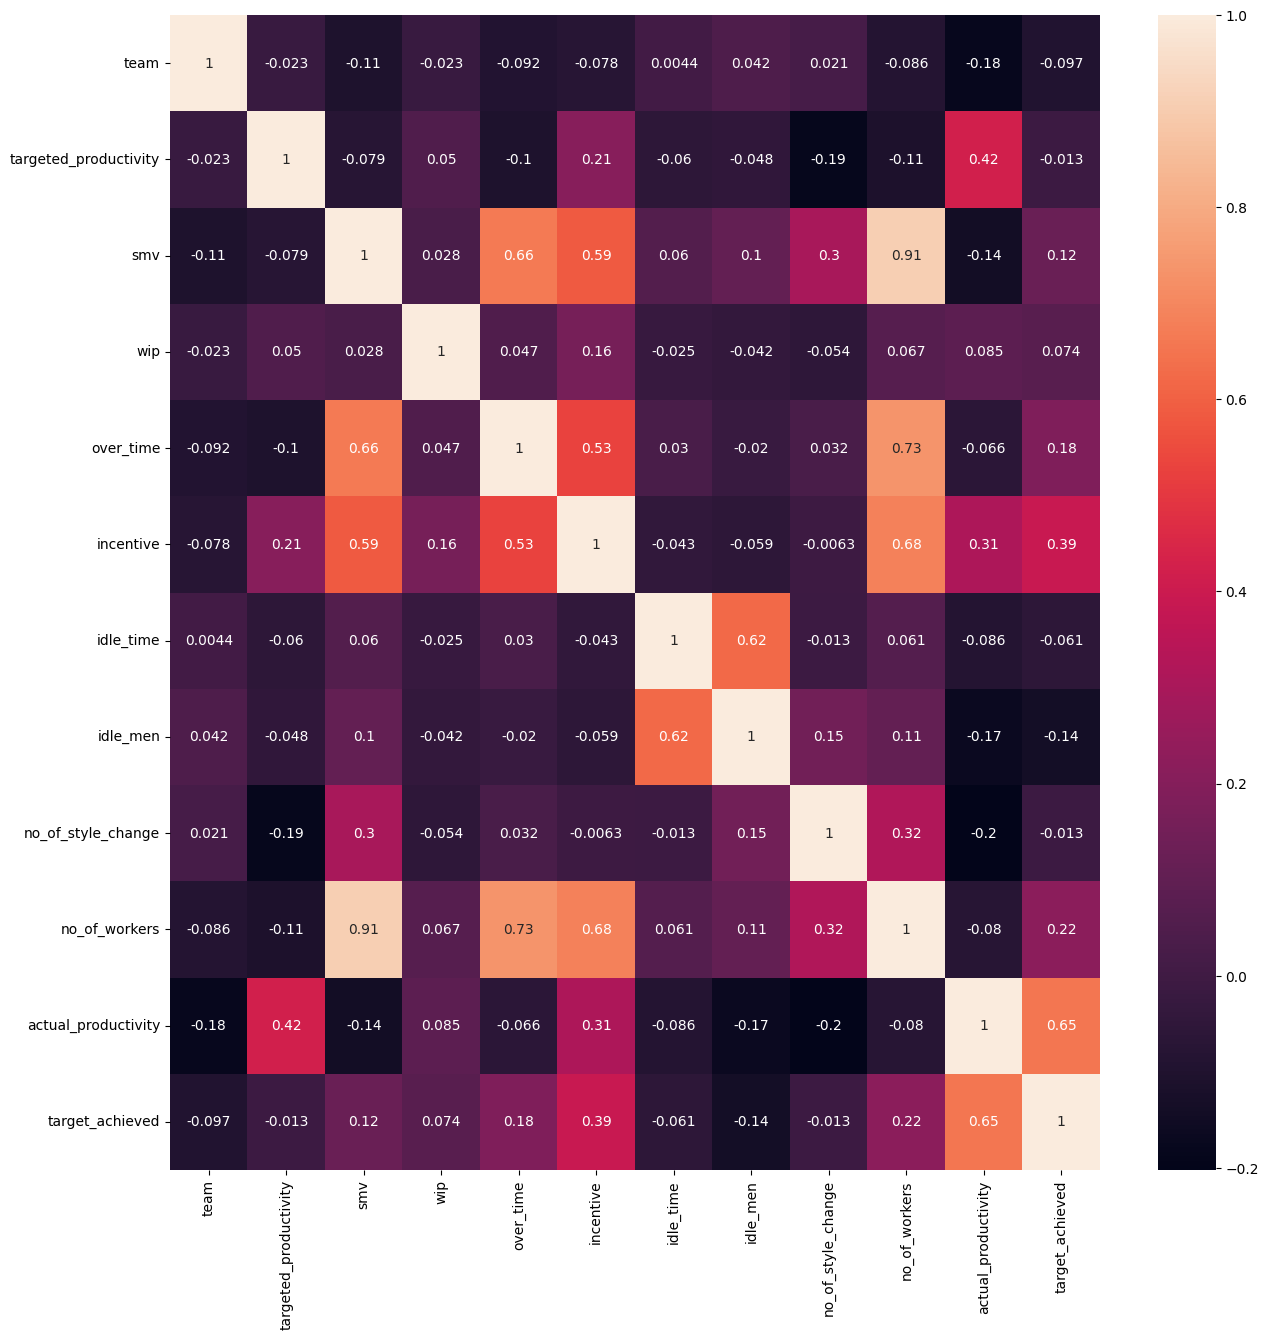

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [61]:
# correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)

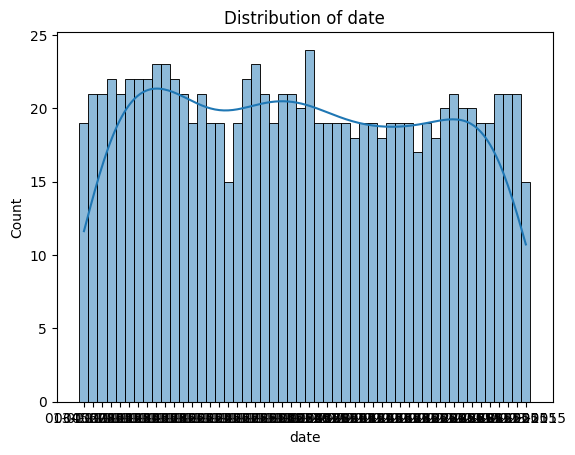

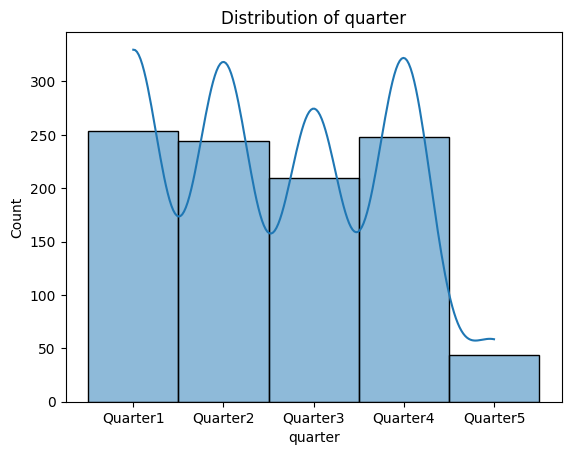

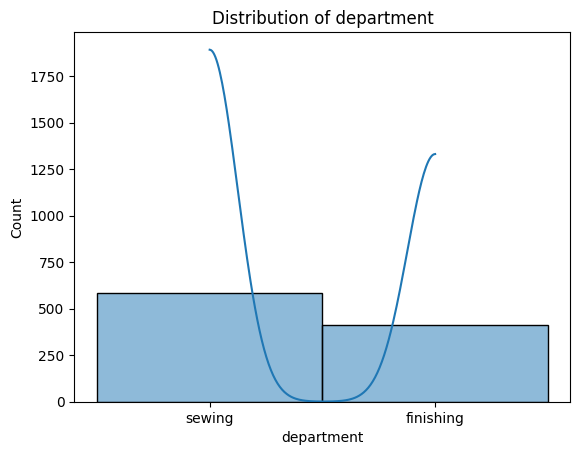

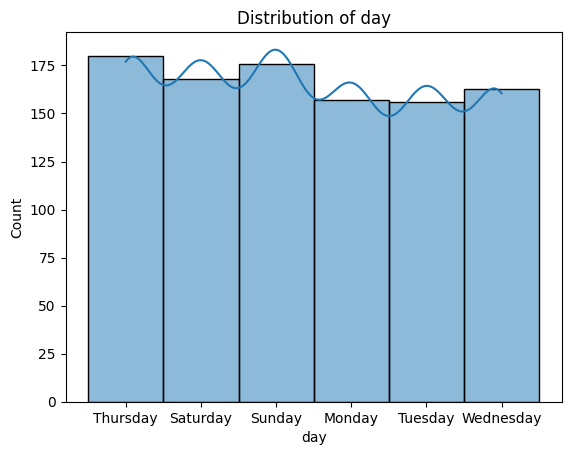

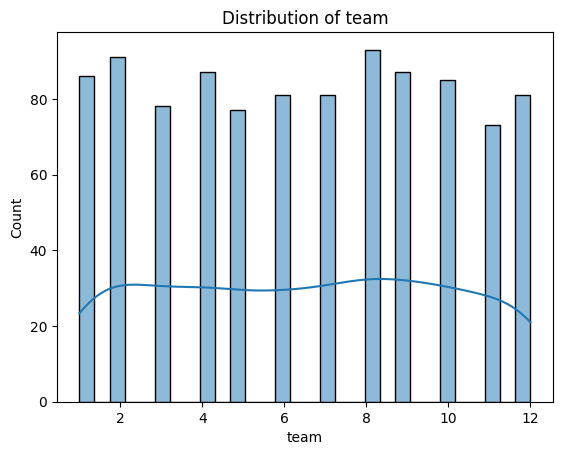

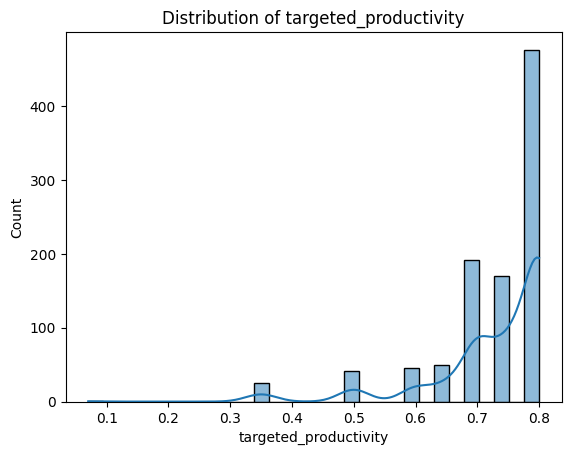

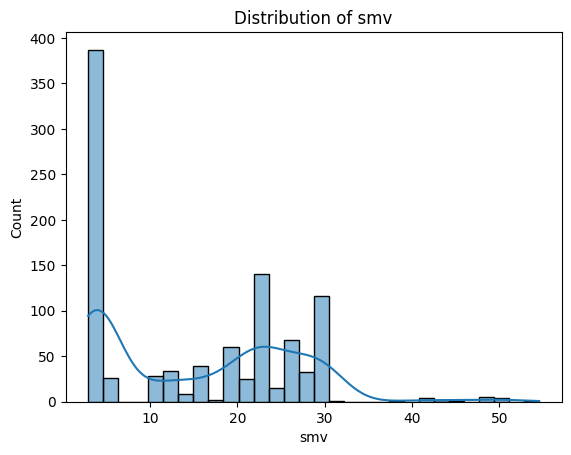

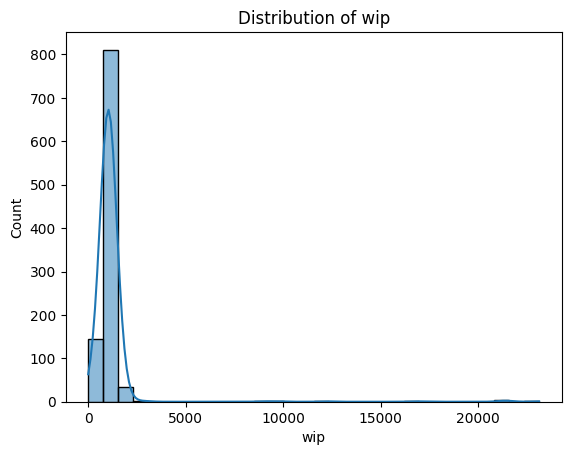

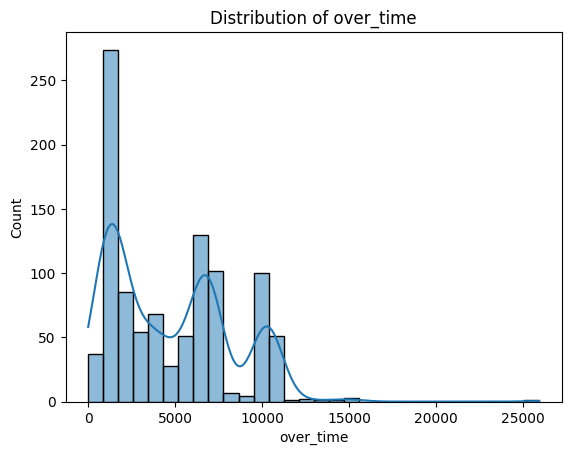

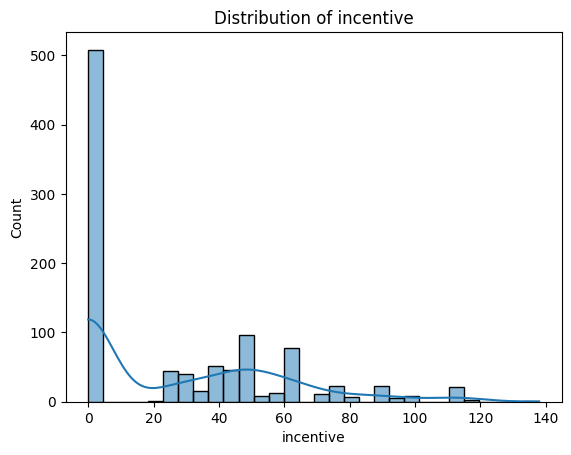

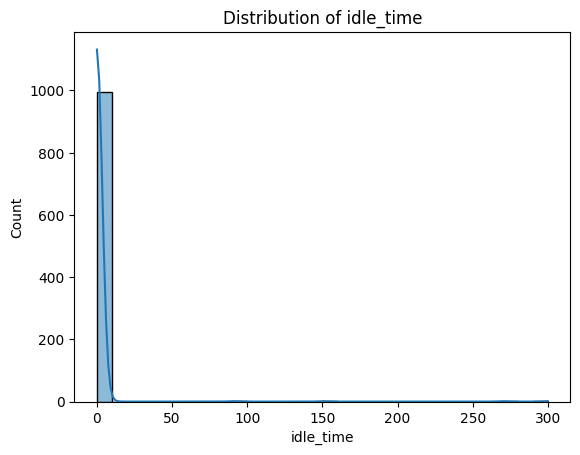

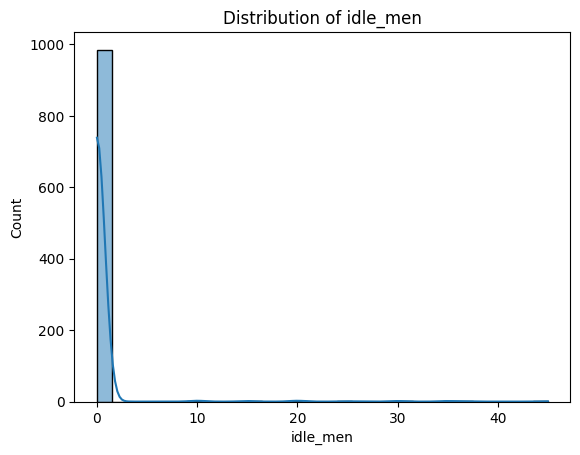

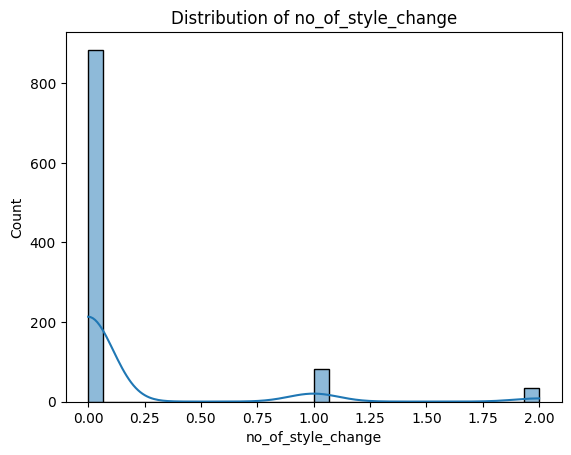

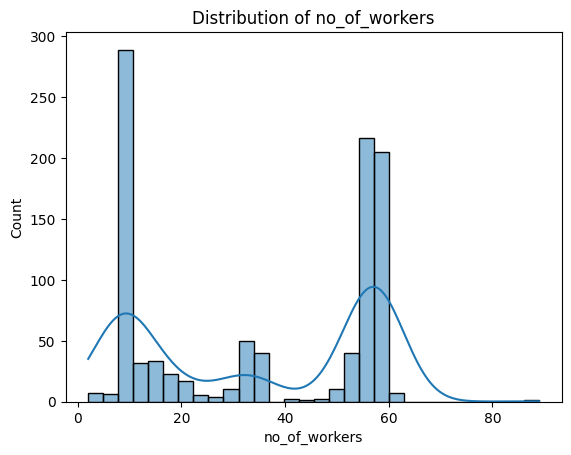

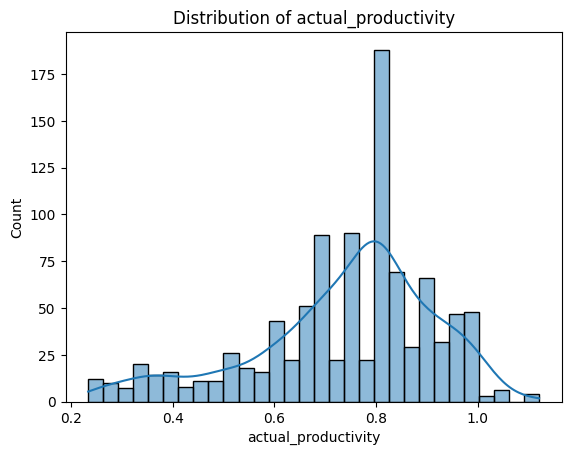

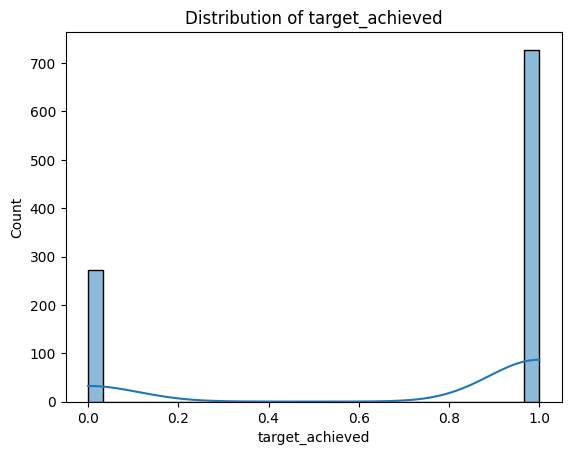

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:

    sns.histplot(df[i], bins=30, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

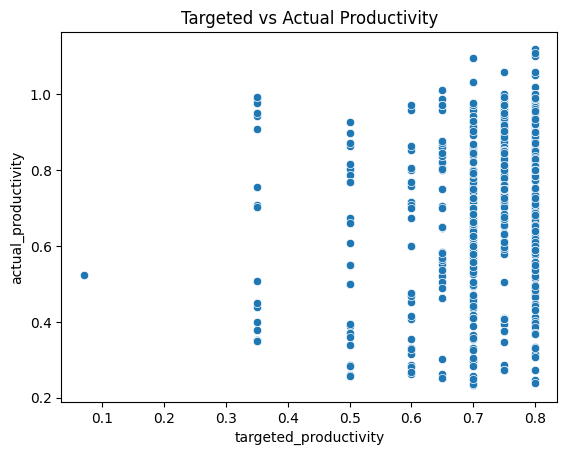

In [63]:
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=df)
plt.title('Targeted vs Actual Productivity')
plt.show()

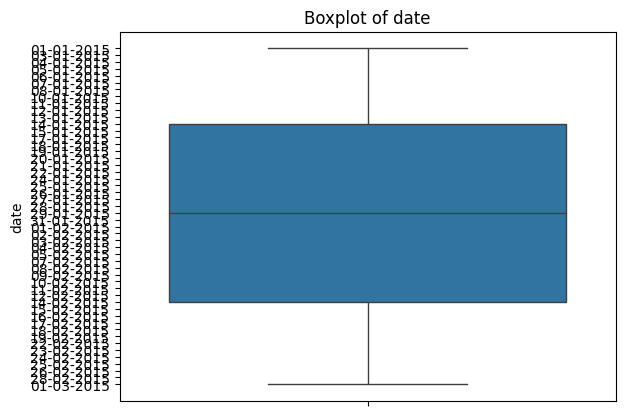

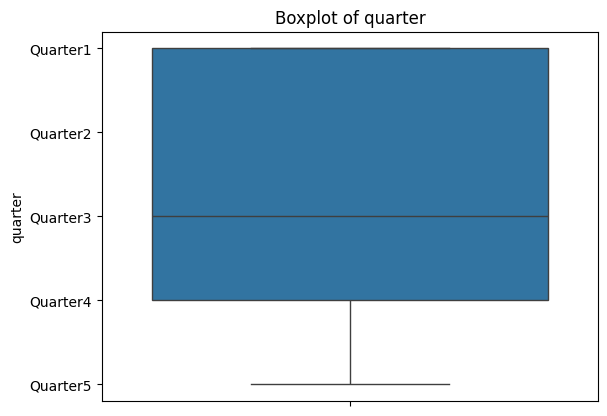

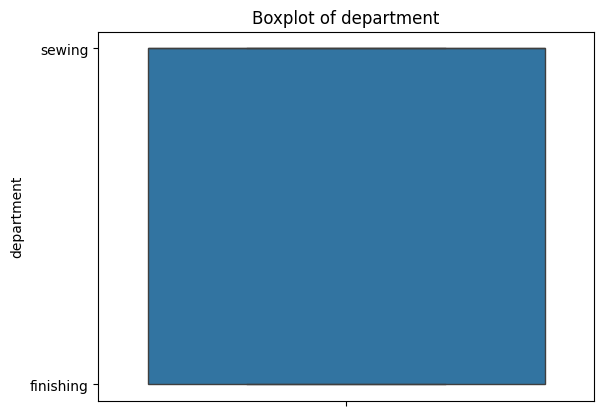

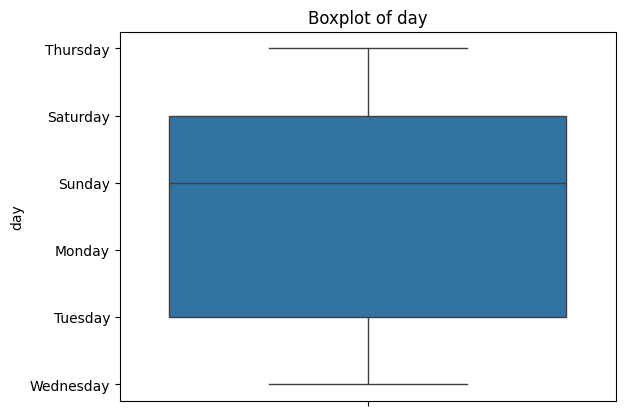

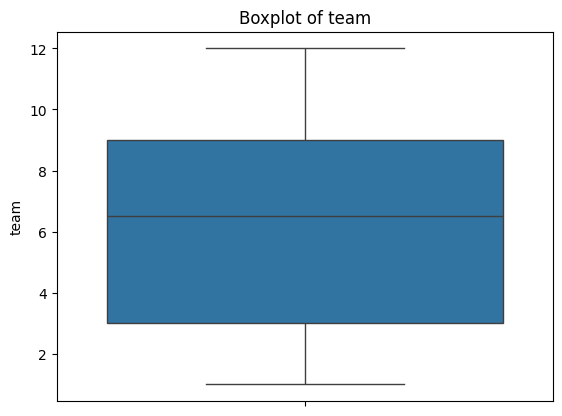

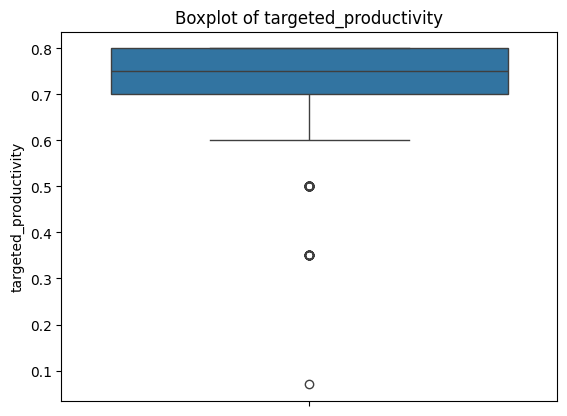

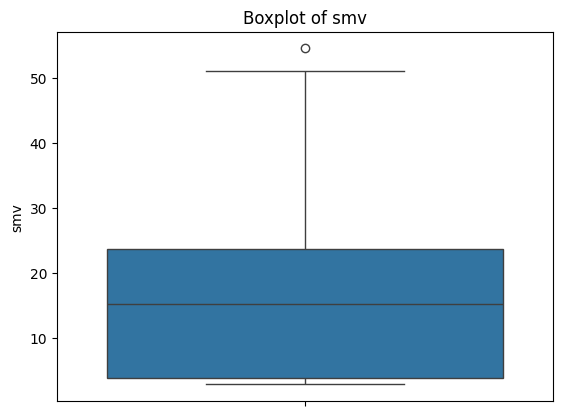

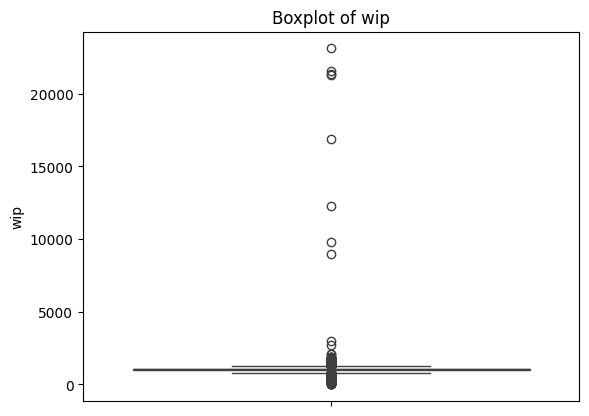

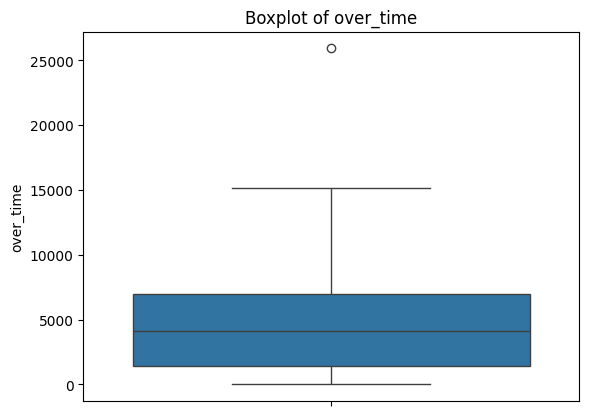

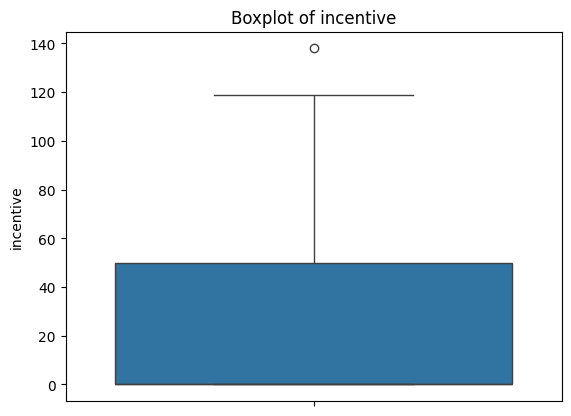

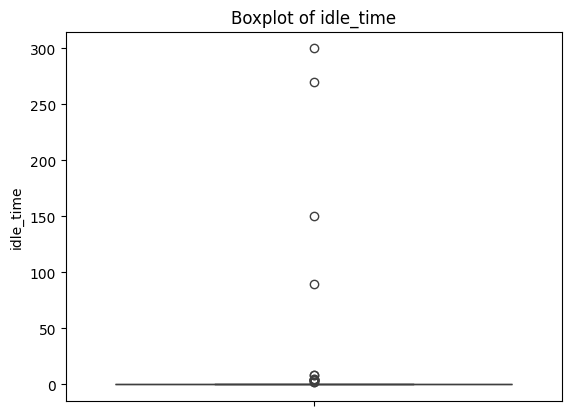

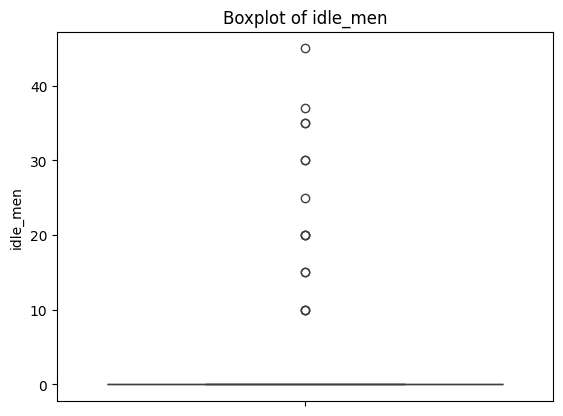

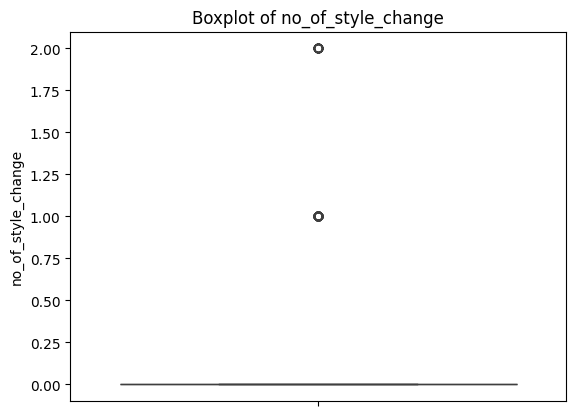

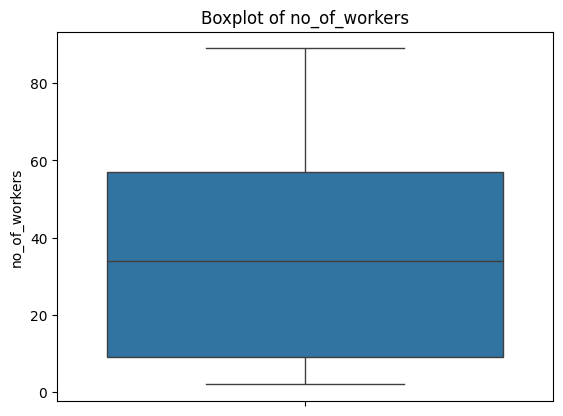

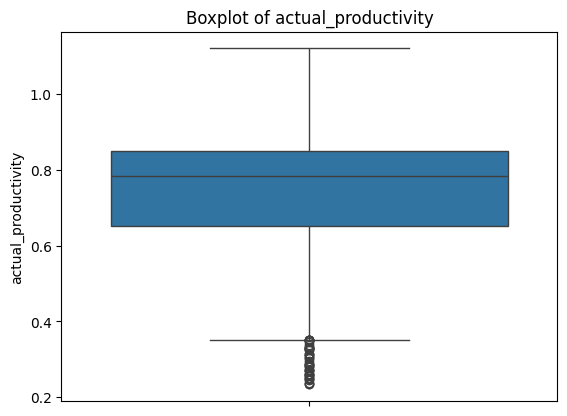

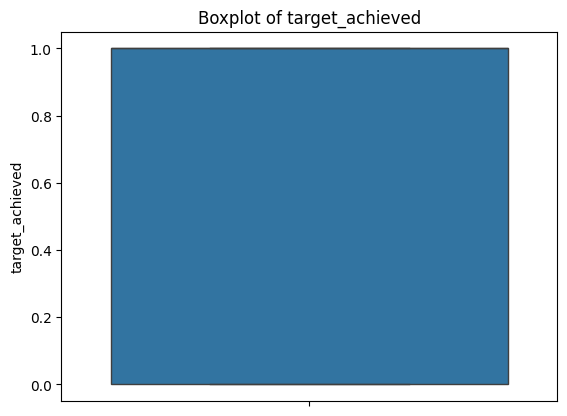

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:

    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [65]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal function to all numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df_out = remove_outliers(df, col)
    print(col)

team
targeted_productivity
smv
wip
over_time
incentive
idle_time
idle_men
no_of_style_change
no_of_workers
actual_productivity
target_achieved


In [66]:
df_out

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,target_achieved
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0,0,0,59.0,0.940725,1
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,1047.0,960,0,0,0,0,8.0,0.886500,1
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0,0,0,30.5,0.800570,1
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0,0,0,30.5,0.800570,1
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,01-03-2015,Quarter1,sewing,Sunday,2,0.70,30.33,254.0,1800,0,0,0,0,58.0,0.683551,0
996,01-03-2015,Quarter1,sewing,Sunday,11,0.80,11.61,347.0,0,50,4,20,0,57.0,0.682433,0
997,01-03-2015,Quarter1,finishing,Sunday,4,0.60,3.94,1047.0,960,0,0,0,0,8.0,0.673083,1
998,01-03-2015,Quarter1,finishing,Sunday,10,0.70,2.90,1047.0,3360,0,0,0,0,8.0,0.664583,0


In [67]:
from sklearn.preprocessing import LabelEncoder

le_quarter = LabelEncoder()
le_department = LabelEncoder()
le_day = LabelEncoder()

df_out['quarter'] = le_quarter.fit_transform(df_out['quarter'])
df_out['department'] = le_department.fit_transform(df_out['department'])
df_out['day'] = le_day.fit_transform(df_out['day'])

In [68]:
df_out.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'target_achieved'],
      dtype='object')

In [69]:
from scipy.stats import chi2_contingency, chi2

cols= ['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']

def calculate_chi_square(column1,column2 = 'actual_productivity'):
    print(f"Correlation between **{column1}** and **{column2}**\n")
    crosstab = pd.crosstab(df_out[column1],df_out[column2])
    stat,p,dof,expected = chi2_contingency(crosstab, correction = True)
    print(f'P_value = {p}, degrees of freedom =  {dof}')
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    print(f'probability = %.3f, critical = %.3f, stat = %.3f' %(prob,critical,stat) )
    if stat >= critical:
        print('dependent(reject(Ho))')
    else:
        print('independent(accept(Ho))')
    alpha = 1.0 - prob
    print(f'significance = %.3f, p-value = %.3f' %(alpha,p))
    if p <= alpha:
        print('dependent(reject(Ho))')
    else:
        print('independent(accept(Ho))')
    print('\n-----------------------------------\n')
print('** Chi_square Correlation between Dichotomous features with Target:Growing stress**\n')
for col in cols:
    calculate_chi_square(col)

** Chi_square Correlation between Dichotomous features with Target:Growing stress**

Correlation between **date** and **actual_productivity**

P_value = 7.744019923560444e-08, degrees of freedom =  36211
probability = 0.950, critical = 36654.786, stat = 37640.676
dependent(reject(Ho))
significance = 0.050, p-value = 0.000
dependent(reject(Ho))

-----------------------------------

Correlation between **quarter** and **actual_productivity**

P_value = 3.85425174684153e-08, degrees of freedom =  2956
probability = 0.950, critical = 3083.599, stat = 3387.941
dependent(reject(Ho))
significance = 0.050, p-value = 0.000
dependent(reject(Ho))

-----------------------------------

Correlation between **department** and **actual_productivity**

P_value = 4.1443179372957514e-10, degrees of freedom =  739
probability = 0.950, critical = 803.352, stat = 1000.000
dependent(reject(Ho))
significance = 0.050, p-value = 0.000
dependent(reject(Ho))

-----------------------------------

Correlation betwe

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dropping columns and splitting the data
X = df_out.drop(columns=['actual_productivity', 'date', 'day', 'wip'])
y = df_out['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming it
X_train = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test = scaler.transform(X_test)


# Multiple Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}')

Linear Regression - MAE: 0.08069382608531325, MSE: 0.013202381110112134


# Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}')

MAE: 0.06321082523426674, MSE: 0.009862691600106208


# Gradient Boosting (XGBoost)

In [74]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost - MAE: {mae_xgb}, MSE: {mse_xgb}')

XGBoost - MAE: 0.06649066700268119, MSE: 0.010851400268544158


# Gradient Boosting (LightGBM)

In [75]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print(f'LightGBM - MAE: {mae_lgbm}, MSE: {mse_lgbm}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 0.739702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

# Support Vector Regression (SVR)

In [76]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR - MAE: {mae_svr}, MSE: {mse_svr}')

SVR - MAE: 0.07568010495378195, MSE: 0.010286004990193609


# Neural Network (MLP Regressor)

In [77]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor - MAE: {mae_mlp}, MSE: {mse_mlp}')

MLP Regressor - MAE: 0.09041833198839284, MSE: 0.015131634225551038


<i><h1 style="color: yellow;">Best Random Forest and XGBoost Gradient Boosting</h1><i>

In [78]:
X.columns

Index(['quarter', 'department', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'target_achieved'],
      dtype='object')

In [79]:
df_out['department']

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: department, Length: 1000, dtype: int32

In [80]:
df['department']

0         sewing
1      finishing
2         sewing
3         sewing
4         sewing
         ...    
995       sewing
996       sewing
997    finishing
998    finishing
999       sewing
Name: department, Length: 1000, dtype: object